# Importación de Librerías Necesarias
Importación de librerías esenciales para análisis de datos (pandas, numpy), visualización (matplotlib, seaborn), procesamiento de lenguaje natural (nltk, spacy) y análisis de sentimiento (textblob, vader).

In [ ]:
%pip install langdetect

In [ ]:
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

In [10]:
# Importación de librerías esenciales para análisis de datos
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas y manejo de arrays

# Importación de librerías para visualización
import matplotlib.pyplot as plt  # Para crear gráficos básicos
import seaborn as sns  # Para gráficos estadísticos avanzados

# Importación de librerías para procesamiento de lenguaje natural
import nltk  # Para tareas de procesamiento de texto
from nltk.sentiment import SentimentIntensityAnalyzer  # Para análisis de sentimiento con VADER
import spacy  # Para análisis avanzado de texto

# Importación de librerías para análisis de sentimiento
from textblob import TextBlob  # Para análisis de sentimiento basado en reglas

# Descargar recursos necesarios para nltk
nltk.download('vader_lexicon')  # Descargar lexicón para análisis de sentimiento con VADER
nltk.download('punkt')  # Descargar tokenizer para procesamiento de texto con nltk

# Cargar modelo de lenguaje de spaCy
nlp_en = spacy.load('en_core_web_sm')  # Modelo en inglés para análisis de texto
nlp_es = spacy.load('es_core_news_sm')  # Modelo en español para análisis de texto

#Importar detector de idioma
import langdetect
from langdetect import detect

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Determinar el idioma del texto en las letras de las canciones

In [8]:
# Función para determinar qué modelo usar según el idioma
def process_text(text):
    try:
        # Detectar idioma
        lang = detect(text)
        
        # Aplicar el modelo adecuado
        if lang == 'es':
            return nlp_es(text), 'es'
        else:  # Por defecto usar inglés
            return nlp_en(text), 'en'
    except Exception as e:
        print(f"Error procesando texto: {e}")
        # Si hay error en la detección, usar inglés por defecto
        return nlp_en(text), 'unknown'

# Función para análisis de sentimiento adaptada a ambos idiomas
def analyze_sentiment(text):
    try:
        lang = detect(text)
        
        if lang == 'es':
            # TextBlob para español
            blob = TextBlob(text)
            return {
                'polarity': blob.sentiment.polarity,
                'subjectivity': blob.sentiment.subjectivity,
                'lang': 'es'
            }
        else:
            # VADER para inglés
            sia = SentimentIntensityAnalyzer()
            sentiment = sia.polarity_scores(text)
            sentiment['lang'] = 'en'
            return sentiment
    except Exception as e:
        print(f"Error analizando sentimiento: {e}")
        # En caso de error, intentar con VADER
        sia = SentimentIntensityAnalyzer()
        sentiment = sia.polarity_scores(text)
        sentiment['lang'] = 'unknown'
        return sentiment

# Carga y Exploración Inicial de Datos
Carga de archivos CSV con información de canciones y letras. Exploración inicial para entender la estructura de datos, verificar valores faltantes y obtener estadísticas básicas.

In [16]:
import csv
# Cargar archivo CSV con información de canciones
songs_path = 'db/wendigosongs.csv'
albums_path = 'db/wendigoalbums.csv'
moods_path = 'db/wendigomoods.csv'
song_moods_path = 'db/wendigomoodsongs.csv'
artists_path = 'db/wendigoartist.csv'

#Cargar datasets
df_songs = pd.read_csv(songs_path,
                       quoting=csv.QUOTE_MINIMAL, 
                       escapechar='\\', 
                       quotechar='"', 
                       on_bad_lines='skip')

df_albums = pd.read_csv(albums_path,
                        quoting=csv.QUOTE_MINIMAL,
                        escapechar='\\',
                        quotechar='"',
                        on_bad_lines='skip')

df_moods = pd.read_csv(moods_path,
                       quoting=csv.QUOTE_MINIMAL,
                       escapechar='\\',
                       quotechar='"',
                       on_bad_lines='skip')

df_song_moods = pd.read_csv(song_moods_path,
                        quoting=csv.QUOTE_MINIMAL,
                        escapechar='\\',
                        quotechar='"',
                        on_bad_lines='skip')

df_artists = pd.read_csv(artists_path,
                         quoting=csv.QUOTE_MINIMAL,
                         escapechar='\\',
                         quotechar='"',
                         on_bad_lines='skip')

# Mostrar los primeros registros de cada dataset
print("=== Información de canciones ===")
print(f"Dimensiones: {df_songs.shape}")
print(df_songs.info())
print("\nPrimeras 5 filas:")
display(df_songs.head())

print("\n=== Información del dataset de álbumes ===")
print(f"Dimensiones: {df_albums.shape}")
print(df_albums.info())
print("\nPrimeras 5 filas:")
display(df_albums.head())

print("\n=== Información del dataset de moods ===")
print(f"Dimensiones: {df_moods.shape}")
print(df_moods.info())
print("\nPrimeras 5 filas:")
display(df_moods.head())

print("\n=== Información del dataset de relación canciones-moods ===")
print(f"Dimensiones: {df_song_moods.shape}")
print(df_song_moods.info())
print("\nPrimeras 5 filas:")
display(df_song_moods.head())

print("\n=== Información del dataset de artistas ===")
print(f"Dimensiones: {df_artists.shape}")
print(df_artists.info())
print("\nPrimeras 5 filas:")
display(df_artists.head())



=== Información de canciones ===
Dimensiones: (56291, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56291 entries, 0 to 56290
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           55817 non-null  object
 1   name         13407 non-null  object
 2   youtube_url  3711 non-null   object
 3   spotify_id   1459 non-null   object
 4   created_at   6745 non-null   object
 5   lyrics       4985 non-null   object
 6   genre        461 non-null    object
 7   bpm          5583 non-null   object
 8   artist       5436 non-null   object
dtypes: object(9)
memory usage: 3.9+ MB
None

Primeras 5 filas:


,id,name,youtube_url,spotify_id,created_at,lyrics,genre,bpm,artist
0,13,Lose Yourself,https://www.allmusic.com/artist/eminem-mn00001...,NaN,2025-03-24 13:24:24,"Look, if you had one shot or one opportunity\n...",NaN,0,Eminem
1,14,(I Can't Get No) Satisfaction,https://www.allmusic.com/artist/the-rolling-st...,NaN,2025-03-24 13:24:24,I can't get no satisfaction\nI can't get no sa...,NaN,0,The Rolling Stones
2,15,Black Hole Sun,https://www.allmusic.com/artist/soundgarden-mn...,NaN,2025-03-24 13:24:24,"In my eyes, indisposed\nIn disguises no one kn...",NaN,0,Soundgarden
3,16,Maybellene,https://www.allmusic.com/artist/chuck-berry-mn...,NaN,2025-03-24 13:24:24,"Maybellene, why can't you be true?\nOh, Maybel...",NaN,0,Chuck Berry
4,17,Cinnamon Girl,https://www.allmusic.com/artist/crazy-horse-mn...,NaN,2025-03-24 13:24:24,I wanna live with a cinnamon girl\nI could be ...,NaN,0,Crazy Horse



=== Información del dataset de álbumes ===
Dimensiones: (1182, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1182 non-null   int64  
 1   name       1182 non-null   object 
 2   artist     0 non-null      float64
 3   cover_url  1182 non-null   object 
 4   album_url  0 non-null      float64
 5   buy_url    1182 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 55.5+ KB
None

Primeras 5 filas:


,id,name,artist,cover_url,album_url,buy_url
0,2,Curtain Call: The Hits,NaN,https://fastly-s3.allmusic.com/release/mr00036...,NaN,https://www.allmusic.com/album/curtain-call-th...
1,3,Forty Licks,NaN,https://fastly-s3.allmusic.com/release/mr00003...,NaN,https://www.allmusic.com/album/forty-licks-mw0...
2,4,Superunknown,NaN,https://fastly-s3.allmusic.com/release/mr00037...,NaN,https://www.allmusic.com/album/superunknown-mw...
3,5,The Definitive Collection,NaN,https://fastly-s3.allmusic.com/release/mr00010...,NaN,https://www.allmusic.com/album/the-definitive-...
4,6,Greatest Hits,NaN,https://fastly-s3.allmusic.com/release/mr00008...,NaN,https://www.allmusic.com/album/greatest-hits-m...



=== Información del dataset de moods ===
Dimensiones: (305, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      305 non-null    int64 
 1   name    305 non-null    object
 2   url     305 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.3+ KB
None

Primeras 5 filas:


,id,name,url
0,7,Acerbic,https://www.allmusic.com/mood/acerbic-xa000000...
1,8,Aggressive,https://www.allmusic.com/mood/aggressive-xa000...
2,9,Agreeable,https://www.allmusic.com/mood/agreeable-xa0000...
3,10,Airy,https://www.allmusic.com/mood/airy-xa0000000932
4,11,Ambitious,https://www.allmusic.com/mood/ambitious-xa0000...



=== Información del dataset de relación canciones-moods ===
Dimensiones: (15791, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15791 entries, 0 to 15790
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       15791 non-null  int64
 1   mood_id  15791 non-null  int64
 2   song_id  15791 non-null  int64
dtypes: int64(3)
memory usage: 370.2 KB
None

Primeras 5 filas:


,id,mood_id,song_id
0,13,7,13
1,14,7,14
2,15,7,15
3,16,7,16
4,17,7,17



=== Información del dataset de artistas ===
Dimensiones: (950, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      950 non-null    int64 
 1   name    950 non-null    object
 2   url     950 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.4+ KB
None

Primeras 5 filas:


,id,name,url
0,15,Eminem,https://www.allmusic.com/artist/eminem-mn00001...
1,16,The Rolling Stones,https://www.allmusic.com/artist/the-rolling-st...
2,17,Soundgarden,https://www.allmusic.com/artist/soundgarden-mn...
3,18,Chuck Berry,https://www.allmusic.com/artist/chuck-berry-mn...
4,19,Neil Young,https://www.allmusic.com/artist/neil-young-mn0...


In [17]:
# Verificar la columna de letras
print("=== Análisis de letras de canciones ===")
print(f"Número de canciones con letras: {df_songs['lyrics'].notna().sum()} de {len(df_songs)}")

# Muestra de una letra de canción
print("\nEjemplo de letra de canción:")
sample_lyrics = df_songs.loc[df_songs['lyrics'].notna()].iloc[0]['lyrics']
print(sample_lyrics[:500] + "..." if len(str(sample_lyrics)) > 500 else sample_lyrics)

=== Análisis de letras de canciones ===
Número de canciones con letras: 4985 de 56291

Ejemplo de letra de canción:
Look, if you had one shot or one opportunity
To seize everything you ever wanted in one moment
Would you capture it or just let it slip?
Yo

His palms are sweaty, knees weak, arms are heavy
There's vomit on his sweater already, mom's spaghetti
He's nervous, but on the surface, he looks calm and ready
To drop bombs, but he keeps on forgetting
What he wrote down, the whole crowd goes so loud
He opens his mouth, but the words won't come out
He's chokin', how? Everybody's jokin' now
The clock's run ...


# Limpieza y Preprocesamiento de Datos
Limpieza del dataset manejando valores faltantes, eliminando duplicados y estandarizando formatos. Preparación de los datos para análisis posterior.

In [18]:
# 1. Verificar valores faltantes en cada dataset
print("=== Verificación de valores faltantes ===")
print("\nCanciones:")
print(df_songs.isnull().sum())
print("\nÁlbumes:")
print(df_albums.isnull().sum())
print("\nMoods:")
print(df_moods.isnull().sum())
print("\nRelaciones Canción-Mood:")
print(df_song_moods.isnull().sum())
print("\nArtistas:")
print(df_artists.isnull().sum())

# 2. Verificar duplicados en cada dataset
print("\n=== Verificación de duplicados ===")
print(f"Canciones - Filas duplicadas: {df_songs.duplicated().sum()}")
print(f"Álbumes - Filas duplicadas: {df_albums.duplicated().sum()}")
print(f"Moods - Filas duplicadas: {df_moods.duplicated().sum()}")
print(f"Relaciones Canción-Mood - Filas duplicadas: {df_song_moods.duplicated().sum()}")
print(f"Artistas - Filas duplicadas: {df_artists.duplicated().sum()}")

# 3. Limpieza y preprocesamiento de letras de canciones
# Primero verificamos cuántas canciones tienen letras
letras_disponibles = df_songs['lyrics'].notna().sum()
total_canciones = len(df_songs)
print(f"\n=== Letras de canciones ===")
print(f"Canciones con letras: {letras_disponibles} de {total_canciones} ({letras_disponibles/total_canciones*100:.1f}%)")

# 4. Limpieza básica de letras (para canciones que tienen letras)
def limpiar_letra(texto):
    if pd.isna(texto):
        return texto
    
    # Convertir a minúsculas
    texto = str(texto).lower()
    
    # Eliminar saltos de línea múltiples y espacios extras
    texto = ' '.join(texto.split())
    
    return texto

# Crear una copia de las letras originales y aplicar limpieza básica
df_songs['lyrics_clean'] = df_songs['lyrics'].apply(limpiar_letra)

# 5. Mostrar ejemplo de letra original vs limpiada
if letras_disponibles > 0:
    idx = df_songs['lyrics'].first_valid_index()
    if idx is not None:
        original = df_songs.loc[idx, 'lyrics']
        limpiada = df_songs.loc[idx, 'lyrics_clean']
        
        print("\n=== Ejemplo de limpieza de letra ===")
        print("ORIGINAL (primeros 200 caracteres):")
        print(str(original)[:200] + "..." if len(str(original)) > 200 else original)
        print("\nLIMPIADA (primeros 200 caracteres):")
        print(str(limpiada)[:200] + "..." if len(str(limpiada)) > 200 else limpiada)

# 6. Comprobar consistencia entre datasets relacionados
print("\n=== Verificación de integridad entre datasets ===")

# Verificar si todos los song_id en song_moods existen en songs
song_ids_en_song_moods = set(df_song_moods['song_id'].unique())
song_ids_en_songs = set(df_songs['id'].unique())
songs_faltantes = song_ids_en_song_moods - song_ids_en_songs

print(f"Canciones referenciadas en moods pero no en dataset de canciones: {len(songs_faltantes)}")

# Verificar si todos los mood_id en song_moods existen en moods
mood_ids_en_song_moods = set(df_song_moods['mood_id'].unique())
mood_ids_en_moods = set(df_moods['id'].unique())
moods_faltantes = mood_ids_en_song_moods - mood_ids_en_moods

print(f"Moods referenciados en relaciones pero no en dataset de moods: {len(moods_faltantes)}")

# 7. Resumen final de limpieza
print("\n=== Resumen de datos limpios ===")
print(f"Canciones: {len(df_songs)} registros")
print(f"Álbumes: {len(df_albums)} registros")
print(f"Moods: {len(df_moods)} registros")
print(f"Relaciones Canción-Mood: {len(df_song_moods)} registros")
print(f"Artistas: {len(df_artists)} registros")

=== Verificación de valores faltantes ===

Canciones:
id               474
name           42884
youtube_url    52580
spotify_id     54832
created_at     49546
lyrics         51306
genre          55830
bpm            50708
artist         50855
dtype: int64

Álbumes:
id              0
name            0
artist       1182
cover_url       0
album_url    1182
buy_url         0
dtype: int64

Moods:
id      0
name    0
url     0
dtype: int64

Relaciones Canción-Mood:
id         0
mood_id    0
song_id    0
dtype: int64

Artistas:
id      0
name    0
url     0
dtype: int64

=== Verificación de duplicados ===
Canciones - Filas duplicadas: 18751
Álbumes - Filas duplicadas: 0
Moods - Filas duplicadas: 0
Relaciones Canción-Mood - Filas duplicadas: 0
Artistas - Filas duplicadas: 0

=== Letras de canciones ===
Canciones con letras: 4985 de 56291 (8.9%)

=== Ejemplo de limpieza de letra ===
ORIGINAL (primeros 200 caracteres):
Look, if you had one shot or one opportunity
To seize everything you ever wan

# Análisis Exploratorio de Relaciones Música-Mood
Análisis de la distribución de canciones por diferentes moods. Exploración de relaciones entre atributos musicales y clasificaciones de mood mediante gráficos y estadísticas.

=== Distribución de canciones por mood ===
Top 10 moods más comunes:


,name,count
0,Acerbic,91
32,Calm/Peaceful,87
119,Hungry,86
29,Bright,85
61,Detached,79
138,Lazy,79
244,Soft/Quiet,77
149,Malevolent,76
16,Austere,75
158,Menacing,75


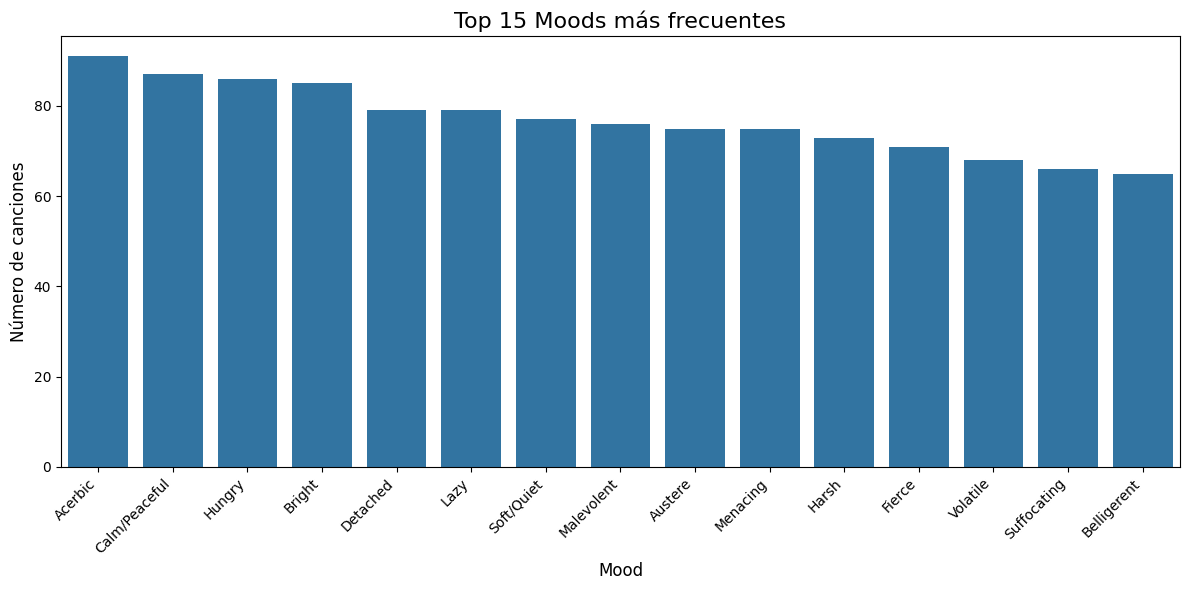

ValueError: You are trying to merge on int64 and object columns for key 'song_id'. If you wish to proceed you should use pd.concat

In [19]:
# 1. Distribución de canciones por mood
print("=== Distribución de canciones por mood ===")

# Contar canciones por mood
mood_counts = df_song_moods.groupby('mood_id').size().reset_index(name='count')
# Unir con nombres de moods
mood_counts = mood_counts.merge(df_moods, left_on='mood_id', right_on='id')
# Ordenar por cantidad descendente
mood_counts = mood_counts.sort_values('count', ascending=False)

print(f"Top 10 moods más comunes:")
display(mood_counts[['name', 'count']].head(10))

# Visualizar distribución de top moods
plt.figure(figsize=(12, 6))
top_moods = mood_counts.head(15)
sns.barplot(x='name', y='count', data=top_moods)
plt.title('Top 15 Moods más frecuentes', fontsize=16)
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Número de canciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Analizar relaciones entre canciones y moods
# Crear dataset unificado con información de canciones y sus moods
songs_with_moods = df_song_moods.merge(df_songs, left_on='song_id', right_on='id')
songs_with_moods = songs_with_moods.merge(df_moods, left_on='mood_id', right_on='id', 
                                         suffixes=('_song', '_mood'))

# 3. Contar número de moods por canción
mood_per_song = df_song_moods.groupby('song_id').size().reset_index(name='num_moods')
plt.figure(figsize=(10, 6))
sns.histplot(mood_per_song['num_moods'], bins=20, kde=True)
plt.title('Distribución del número de moods por canción', fontsize=16)
plt.xlabel('Número de moods asignados', fontsize=12)
plt.ylabel('Número de canciones', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nPromedio de moods por canción: {mood_per_song['num_moods'].mean():.2f}")
print(f"Mediana de moods por canción: {mood_per_song['num_moods'].median()}")
print(f"Moda de moods por canción: {mood_per_song['num_moods'].mode().values[0]}")
print(f"Máximo de moods por canción: {mood_per_song['num_moods'].max()}")

# 4. Encontrar moods que suelen aparecer juntos (co-ocurrencia)
print("\n=== Análisis de co-ocurrencia de moods ===")

# Obtener pares de moods que aparecen en las mismas canciones
mood_pairs = []
for song_id in df_song_moods['song_id'].unique():
    moods = df_song_moods[df_song_moods['song_id'] == song_id]['mood_id'].tolist()
    if len(moods) > 1:
        for i in range(len(moods)):
            for j in range(i+1, len(moods)):
                mood_pairs.append(tuple(sorted([moods[i], moods[j]])))

# Contar frecuencia de cada par de moods
mood_pair_counts = pd.Series(mood_pairs).value_counts().reset_index()
mood_pair_counts.columns = ['mood_pair', 'frequency']

# Obtener nombres de los moods para los pares más frecuentes
if len(mood_pair_counts) > 0:
    top_pairs = mood_pair_counts.head(10)
    print("Top 10 combinaciones de moods más frecuentes:")
    
    for _, row in top_pairs.iterrows():
        mood_id1, mood_id2 = row['mood_pair']
        mood_name1 = df_moods[df_moods['id'] == mood_id1]['name'].values[0]
        mood_name2 = df_moods[df_moods['id'] == mood_id2]['name'].values[0]
        print(f"{mood_name1} + {mood_name2}: {row['frequency']} canciones")

# 5. Explorar artistas o álbumes por mood
print("\n=== Análisis de artistas por mood ===")

# Unir con información de artistas
songs_artists_moods = songs_with_moods.merge(df_artists, left_on='artist_id', right_on='id', 
                                            suffixes=('', '_artist'))

# Contar artistas más frecuentes para cada mood
top_moods_list = mood_counts.head(5)['id_mood'].tolist()
for mood_id in top_moods_list:
    mood_name = df_moods[df_moods['id'] == mood_id]['name'].values[0]
    mood_artists = songs_artists_moods[songs_artists_moods['mood_id'] == mood_id]['name_artist'].value_counts().head(5)
    
    print(f"\nTop 5 artistas para mood '{mood_name}':")
    for artist, count in mood_artists.items():
        print(f"  - {artist}: {count} canciones")

# 6. Visualizar la red de relaciones entre moods (si hay más de 5 moods)
if len(df_moods) > 5:
    plt.figure(figsize=(12, 8))
    
    # Crear matriz de co-ocurrencia
    mood_ids = df_moods['id'].tolist()
    cooccurrence_matrix = pd.DataFrame(0, index=mood_ids, columns=mood_ids)
    
    for pair, freq in zip(mood_pair_counts['mood_pair'], mood_pair_counts['frequency']):
        mood1, mood2 = pair
        cooccurrence_matrix.at[mood1, mood2] = freq
        cooccurrence_matrix.at[mood2, mood1] = freq
    
    # Usar solo los top moods para mayor claridad
    top_mood_ids = top_moods['id'].tolist()
    top_mood_names = top_moods['name'].tolist()
    co_matrix_subset = cooccurrence_matrix.loc[top_mood_ids, top_mood_ids]
    
    # Crear heatmap
    sns.heatmap(co_matrix_subset, annot=True, cmap='viridis', fmt='g', 
                xticklabels=top_mood_names, yticklabels=top_mood_names)
    plt.title('Co-ocurrencia de Moods (Top 15)', fontsize=16)
    plt.tight_layout()
    plt.show()

# Preprocesamiento de Letras de Canciones
Preprocesamiento de letras eliminando stopwords, signos de puntuación y aplicando tokenización. Creación de distribuciones de frecuencia de palabras y visualización con nubes de palabras por cada mood.

# Análisis de Sentimiento en Letras
Implementación de análisis de sentimiento en las letras usando NLTK o TextBlob. Cálculo de puntuaciones de sentimiento (polaridad y subjetividad) para cada canción.

# Correlación entre Sentimiento y Clasificación de Mood
Exploración de la relación entre las puntuaciones de sentimiento y las clasificaciones de mood. Análisis de si el sentimiento positivo/negativo se correlaciona con moods específicos.

# Visualización de Relaciones entre Características y Moods
Creación de visualizaciones para entender la distribución y relación entre varias características y moods. Uso de gráficos de dispersión, diagramas de caja y mapas de calor para identificar patrones.

# Feature Engineering para Clasificación de Mood
Creación de nuevas características a partir de datos existentes que podrían ser mejores predictores para la clasificación de mood, combinando atributos musicales y características textuales.

# Análisis Estadístico de Características Musicales por Mood
Realización de pruebas estadísticas para identificar diferencias significativas en características entre categorías de mood. Uso de ANOVA, pruebas de chi-cuadrado u otros métodos apropiados.